*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

# CDF and PDF plotting for Probability Estimation

This notebook introduces the concept and methodology of implementing CDF plotting for statistical analysis.

<br>
<div class="alert alert-info">
<h4>Disclaimer</h4><p>The information on this page is based on the petroleum engineering class taught at the <i>University of Texas at Austin</i>, <b>Introduction to Geostatistics</b> by <b>Dr. Michael Pyrcz</b> on Fall 2018. This notebook is a work of a petrolem engineering student, <b>Eric Kim</b>.
</div>

# 0. Sample Data Set

The provided spreadsheet **PoroPermSampleData.xlsx** includes sample porosity  data that will be used through out this notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

data = pd.read_excel('PoroPermSampleData.xlsx', sheet_name='Sheet1')
porosity = np.array(data['Porosity (φ)'])
depth = np.array(data['Depth'])

data.iloc[:, :2].head()

,Depth,Porosity (φ)
0,0.25,12.993634
1,0.50,13.588011
2,0.75,8.962625
3,1.00,17.634879
4,1.25,9.424404


<IPython.core.display.Javascript object>


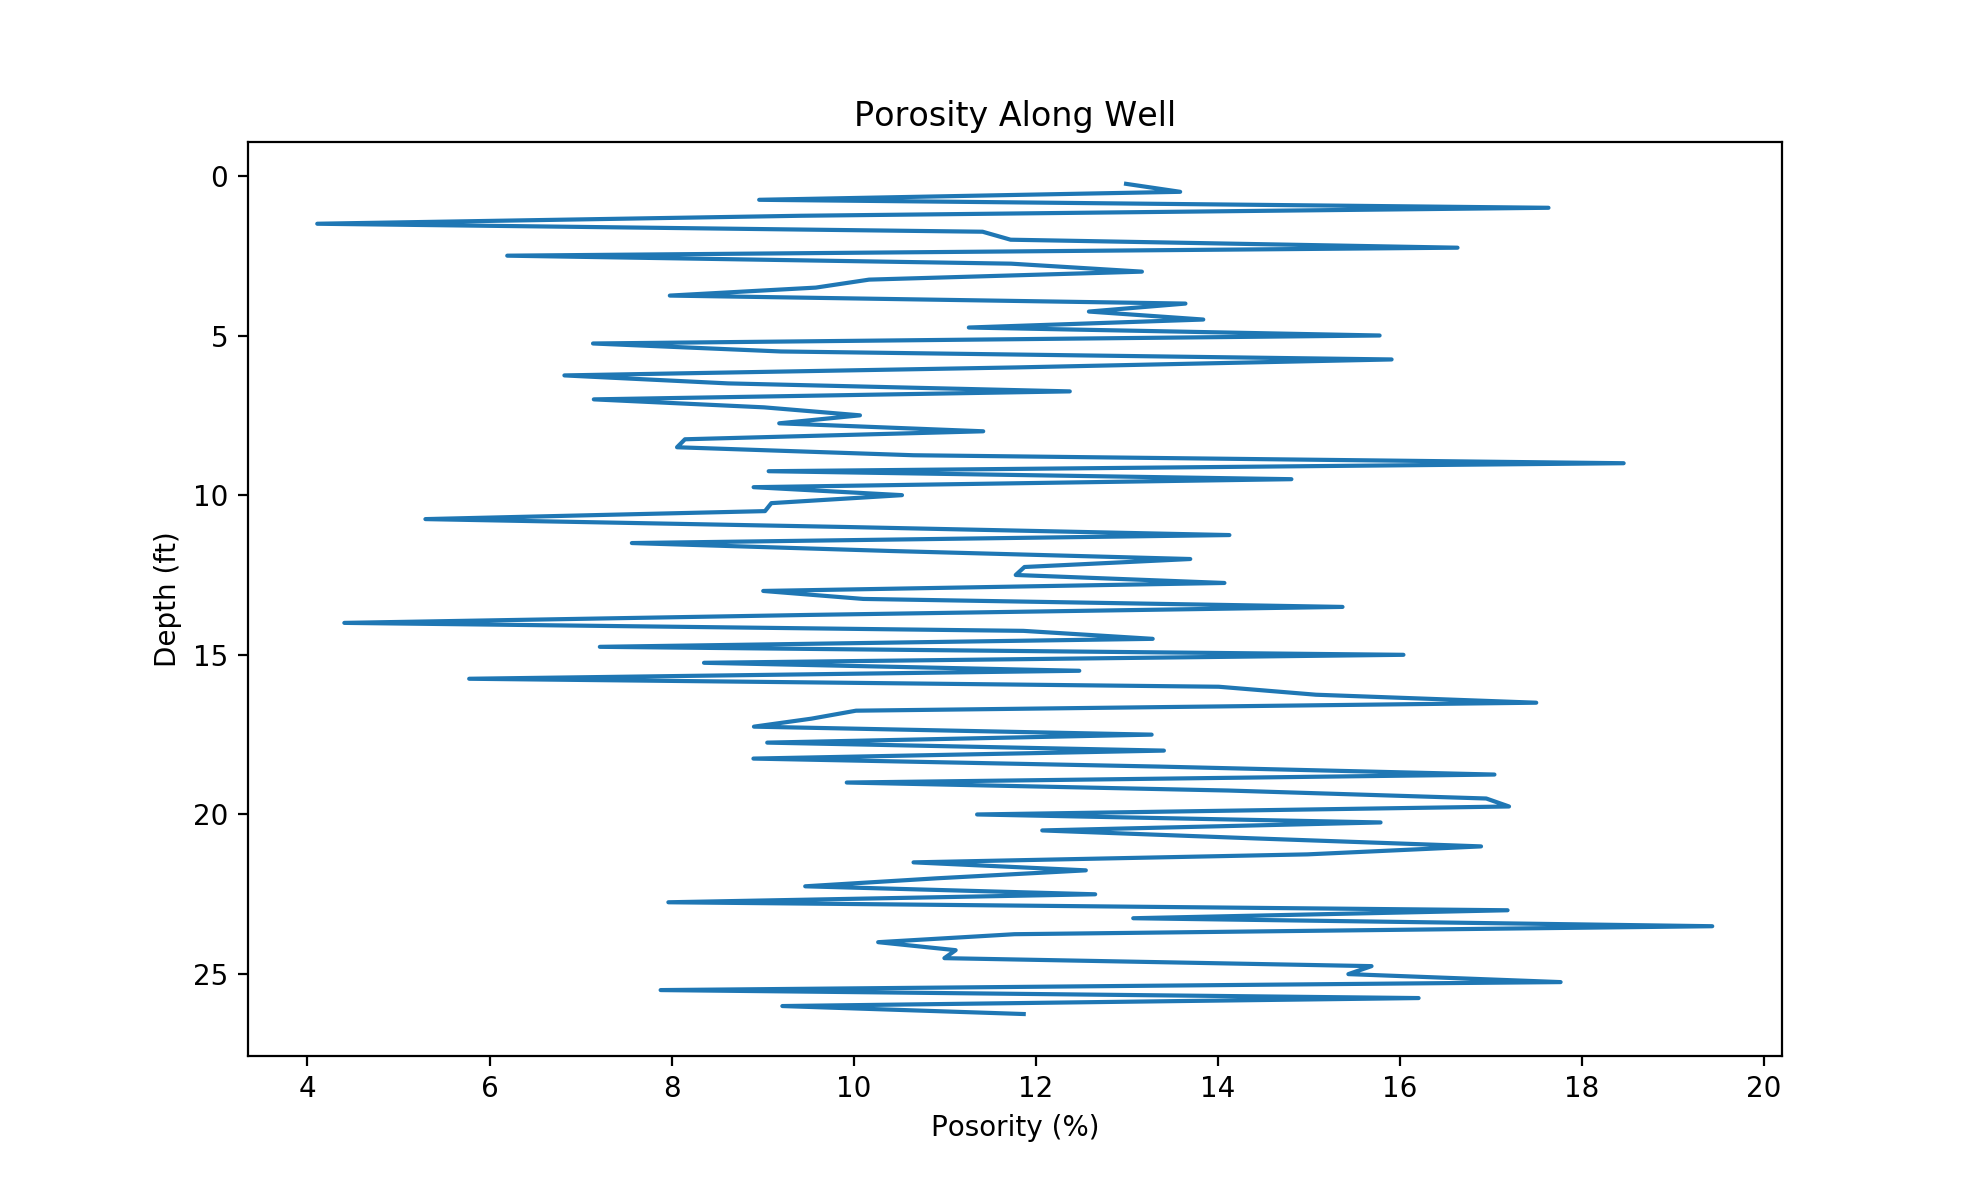

In [11]:
fig = plt.figure()
ax = plt.axes()

ax.plot(porosity, depth);
ax.invert_yaxis()
ax.set_title('Porosity Along Well')
ax.set_xlabel('Posority (%)')
ax.set_ylabel('Depth (ft)');

# 1. Purpose - What Do We Want To Achieve?

We want to answer the following two questions:

> 1. What is the chance of this core sample having porosity of 12%? - Use **Probability Density Function (PDF)**

> 2. What is the chance of this core sample having porosity of **at least** 12%? - Use **Cumulative Distribution Function (CDF)**

# 2.  Probability Density Function (PDF)

<br>
<div class="alert alert-info">
    <p>PDF answers the question of..."What is the probability of this sample having a value of X?"</p>
</div>

Histogram is an example of PDF plot. It shows the probability of a sample having a value of X by grouping samples into a single probability binning. However, conveying information through histogram is heavily impacted by its bin size. 

When implementing histogram PDF, be aware of these factors:

- Top large bins mask information - lack resolution
- Too small bins are too noisy - lack samples in each bin for stable assessment of frequency or proportion

<IPython.core.display.Javascript object>


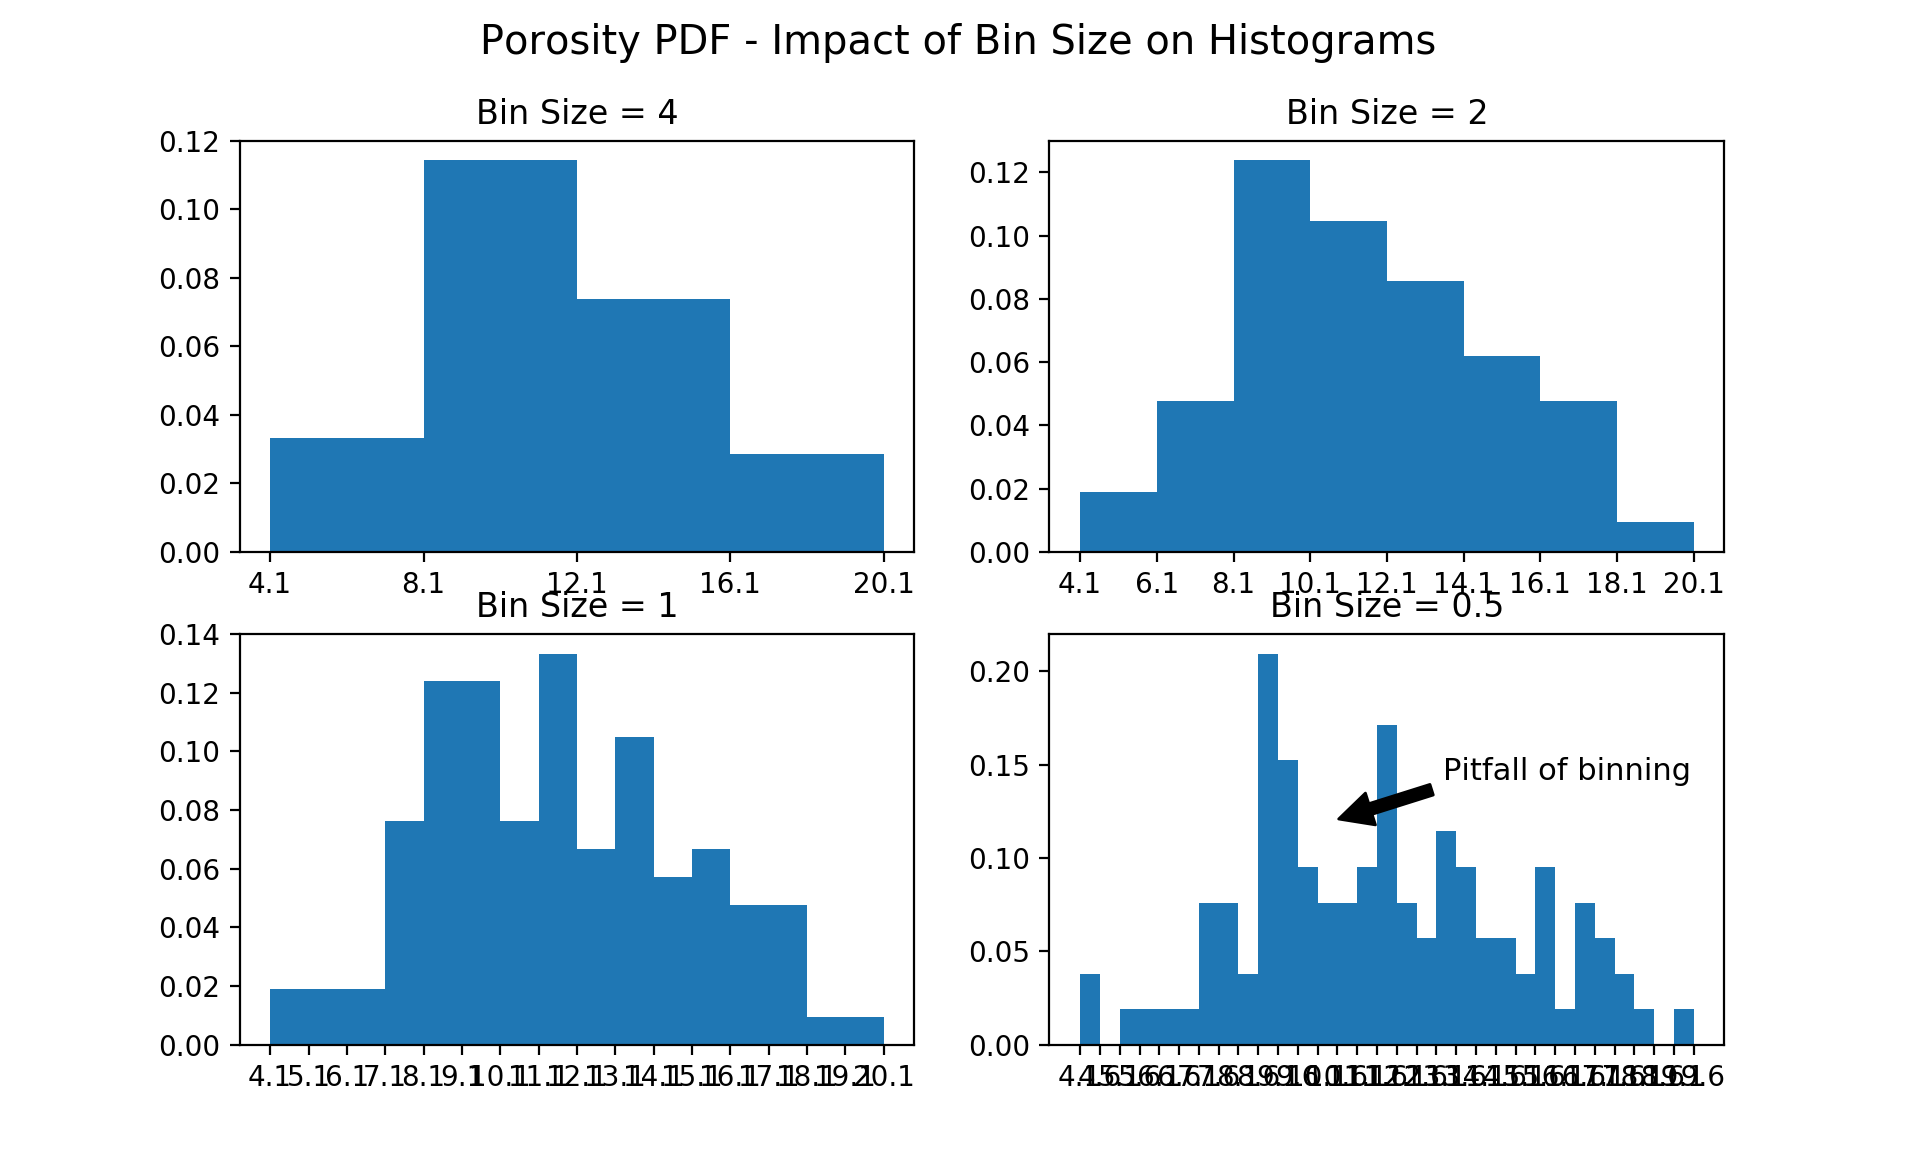

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.suptitle('Porosity PDF - Impact of Bin Size on Histograms', fontsize="x-large")

n, bins, patches = ax1.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 4, 4), density=True)
ax1.set_xticks(bins)
ax1.set_title('Bin Size = 4')

n, bins, patches = ax2.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 2, 2), density=True)
ax2.set_xticks(bins)
ax2.set_title('Bin Size = 2')

n, bins, patches = ax3.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 1, 1), density=True)
ax3.set_xticks(bins)
ax3.set_title('Bin Size = 1')

n, bins, patches = ax4.hist(porosity, bins=np.arange(min(porosity), max(porosity) + 0.5, 0.5), density=True)
ax4.set_xticks(bins)
ax4.set_title('Bin Size = 0.5')

# ax4.text(13, 0.15, 'pitfall of binning', fontsize=11)
ax4.annotate('Pitfall of binning', xy=(10.5, 0.12), xytext=(0.95, 0.7), textcoords='axes fraction', 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=11, 
             horizontalalignment='right', verticalalignment='top');

# 3.  Cumulative Distribution Function (CDF)

<br>
<div class="alert alert-info">
    <p>CDF answers the question of ... "What is the probability of this sample having a value of <b>at least</b> X ?</p>
</div>

The CDF is the sum of a discrete PDF or the integral of a continuous PDF. 

The steps to convert PDF into CDF are as follows:

#### 1. Sort the data in ascending order.

In [2]:
porosity.sort()
pd.DataFrame(data=porosity, columns=['Porosity (φ)']).head(10)

,Porosity (φ)
0,4.107222
1,4.404817
2,5.295603
3,5.776503
4,6.194651
5,6.822579
6,7.136921
7,7.145891
8,7.212025
9,7.563810


#### 2. Append a cumulative probability column.

In [16]:
# Create cumulative probability column
num_samples = len(porosity)
cum_probability = np.array([i / num_samples for i in range(1, num_samples + 1)])

# Append cumulative probability column
cdf_data = np.vstack((cum_probability, porosity)).T

pd.DataFrame(data=cdf_data, columns=['Cum. Probability', 'Porosity (φ)']).head(10)

,Cum. Probability,Porosity (φ)
0,0.009524,4.107222
1,0.019048,4.404817
2,0.028571,5.295603
3,0.038095,5.776503
4,0.047619,6.194651
5,0.057143,6.822579
6,0.066667,7.136921
7,0.076190,7.145891
8,0.085714,7.212025
9,0.095238,7.563810


#### 3. Plot the CDF

<IPython.core.display.Javascript object>


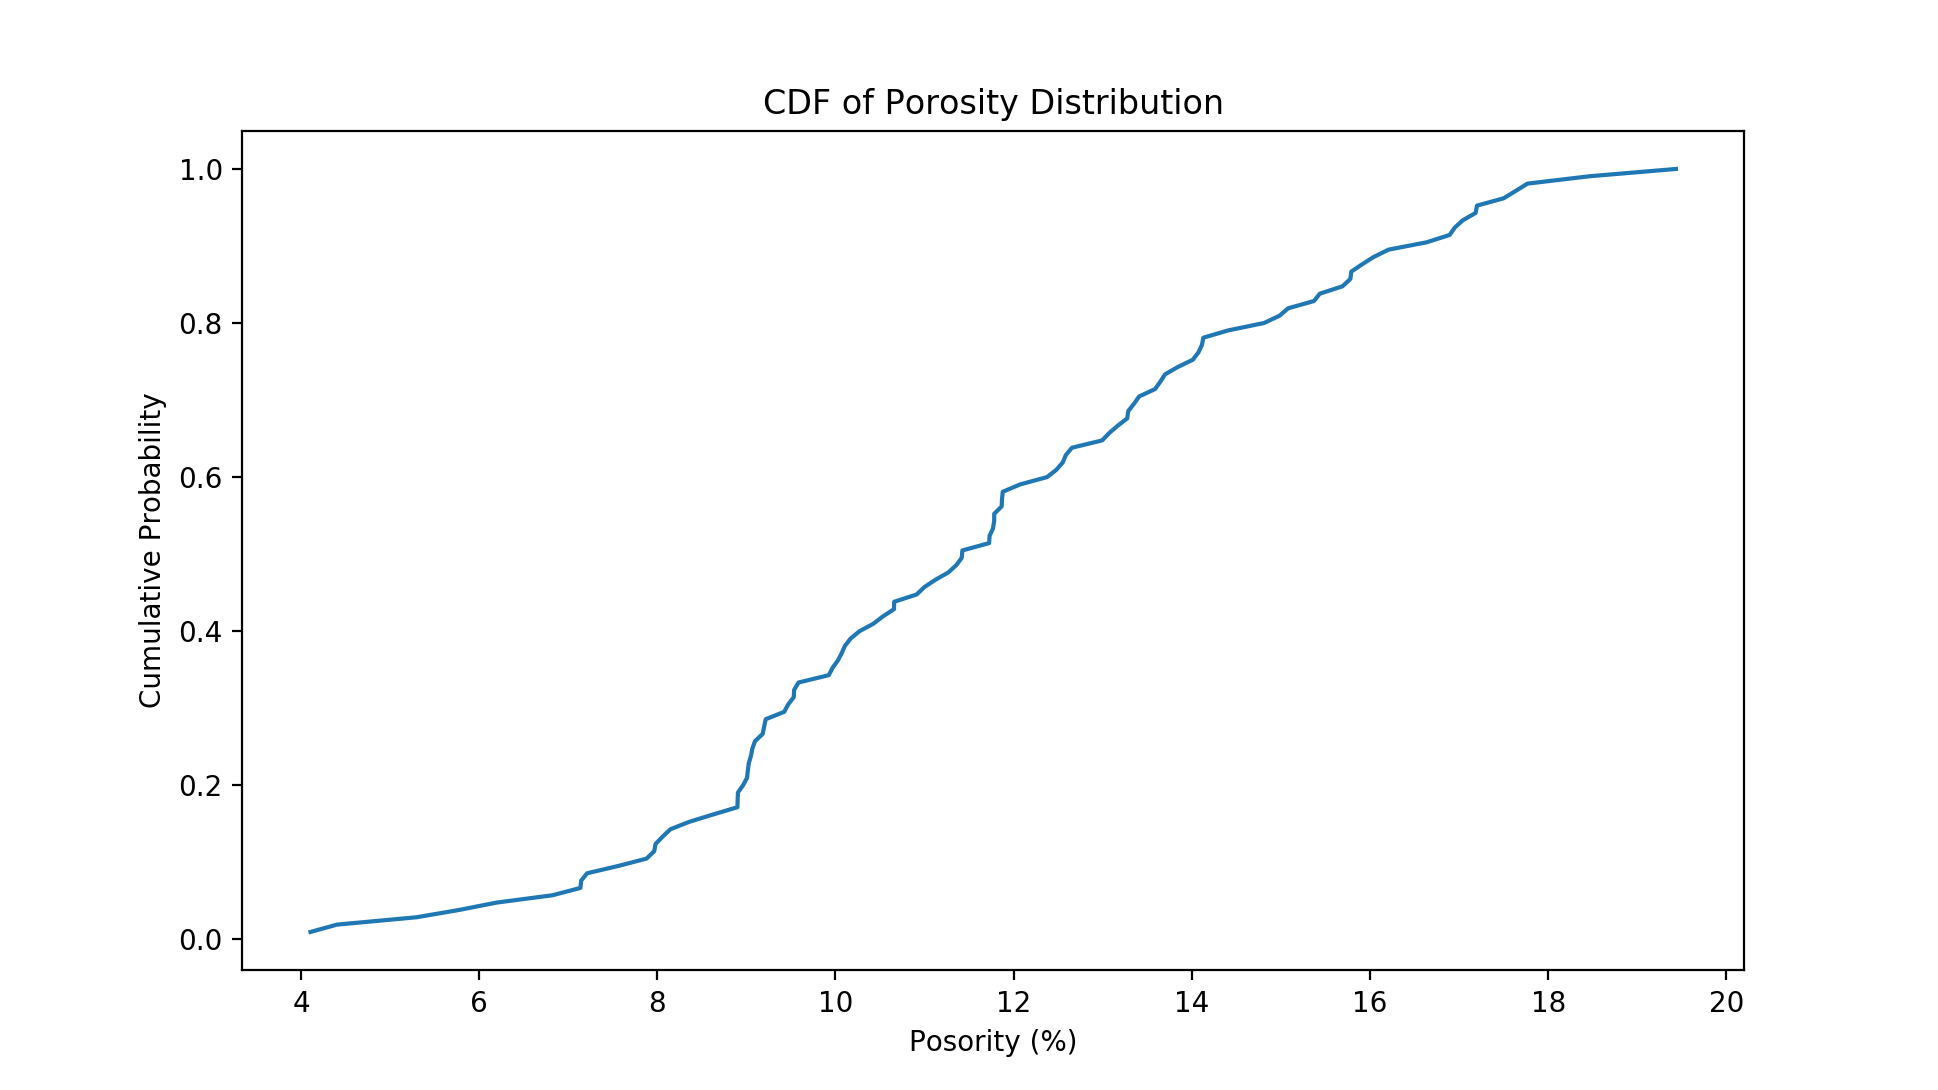

In [22]:
fig = plt.figure()
ax = plt.axes()

ax.plot(porosity, cum_probability)
ax.set_title('CDF of Porosity Distribution')
ax.set_xlabel('Posority (%)')
ax.set_ylabel('Cumulative Probability');

## 3.1 Application of CDF

> ### Question 1: What is the probability of a next core sample having a porosity of **at least** 14% ?

<IPython.core.display.Javascript object>


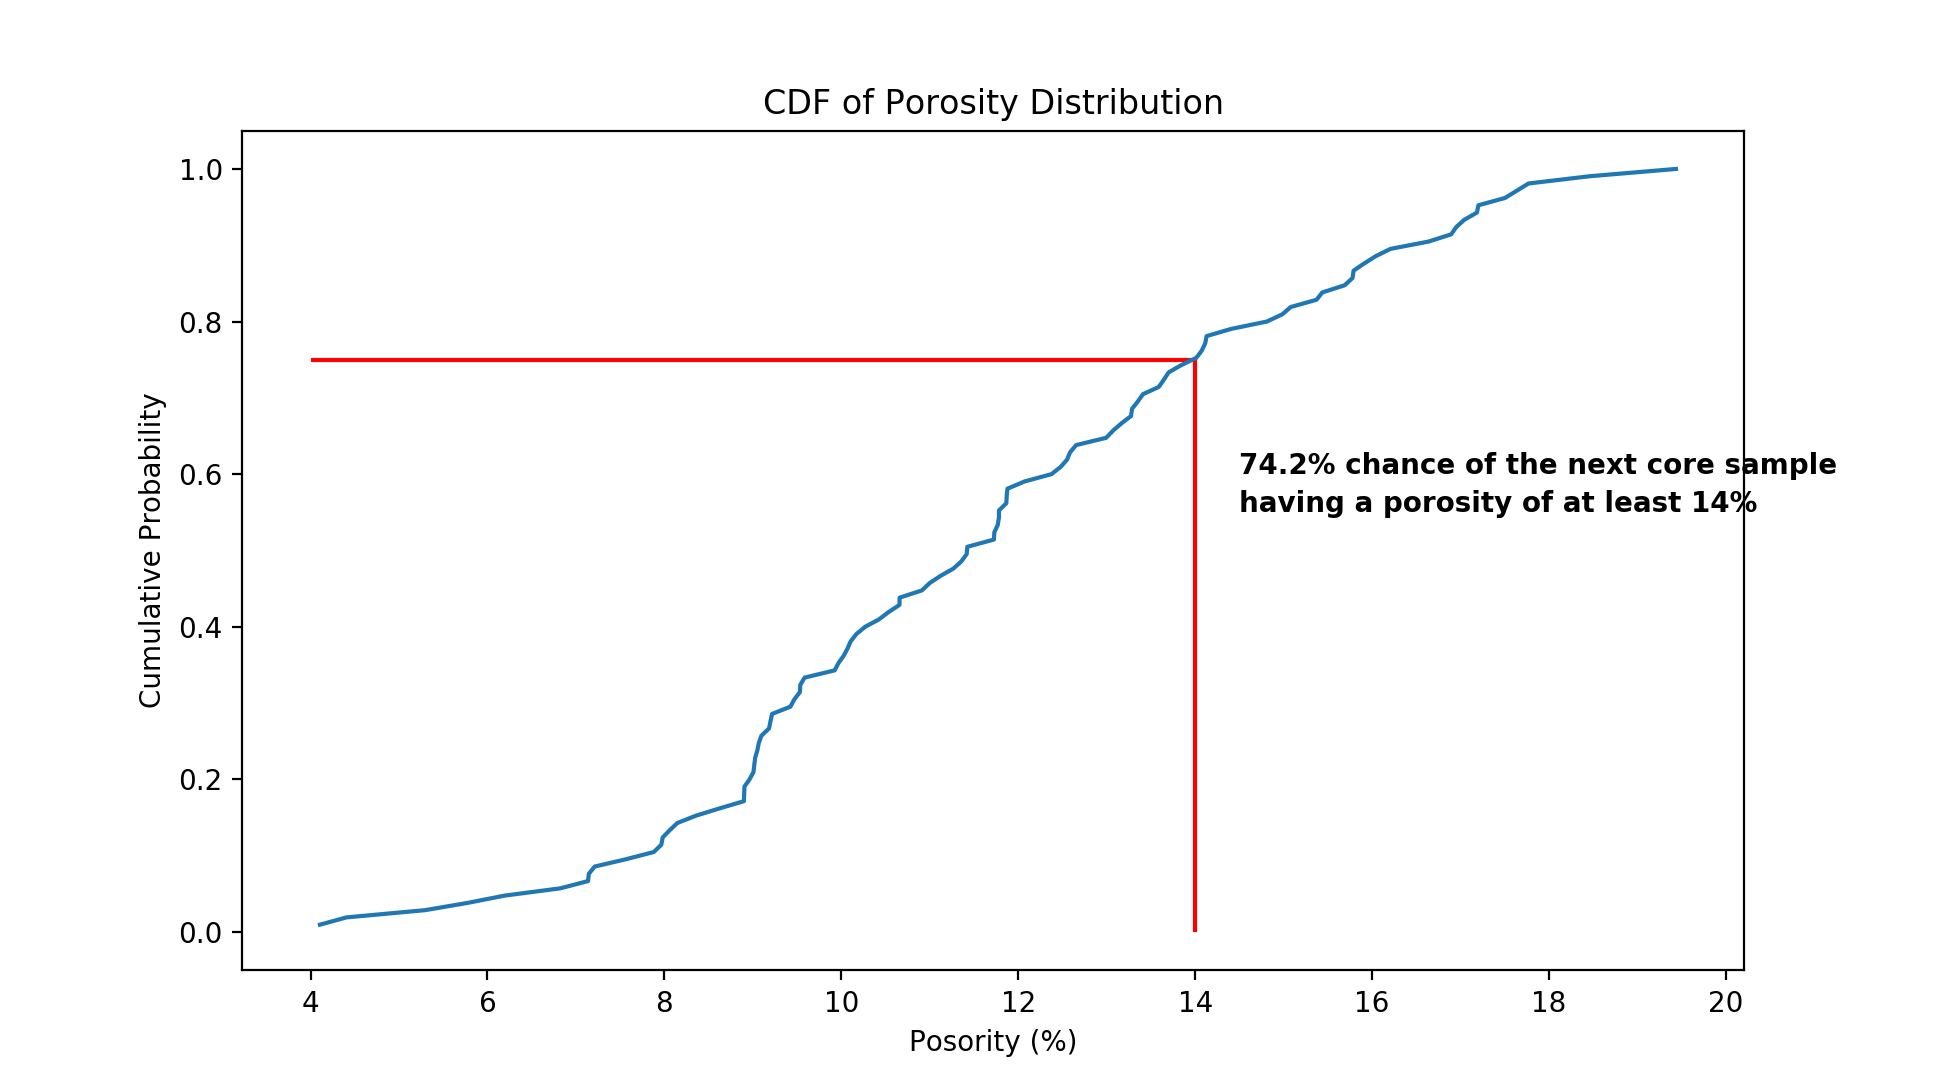

In [23]:
h = ax.hlines(y=0.75, xmin=4, xmax=14, color='red')
v = ax.vlines(x=14, ymin=0, ymax=0.75, color='red')
t1 = ax.text(14.5, 0.6, '74.2% chance of the next core sample', weight='bold')
t2 = ax.text(14.5, 0.55, 'having a porosity of at least 14%', weight='bold')
fig

> ### Question 2 : What is the probability of a next core sample having a porosity of **at least** 10% ?

<IPython.core.display.Javascript object>


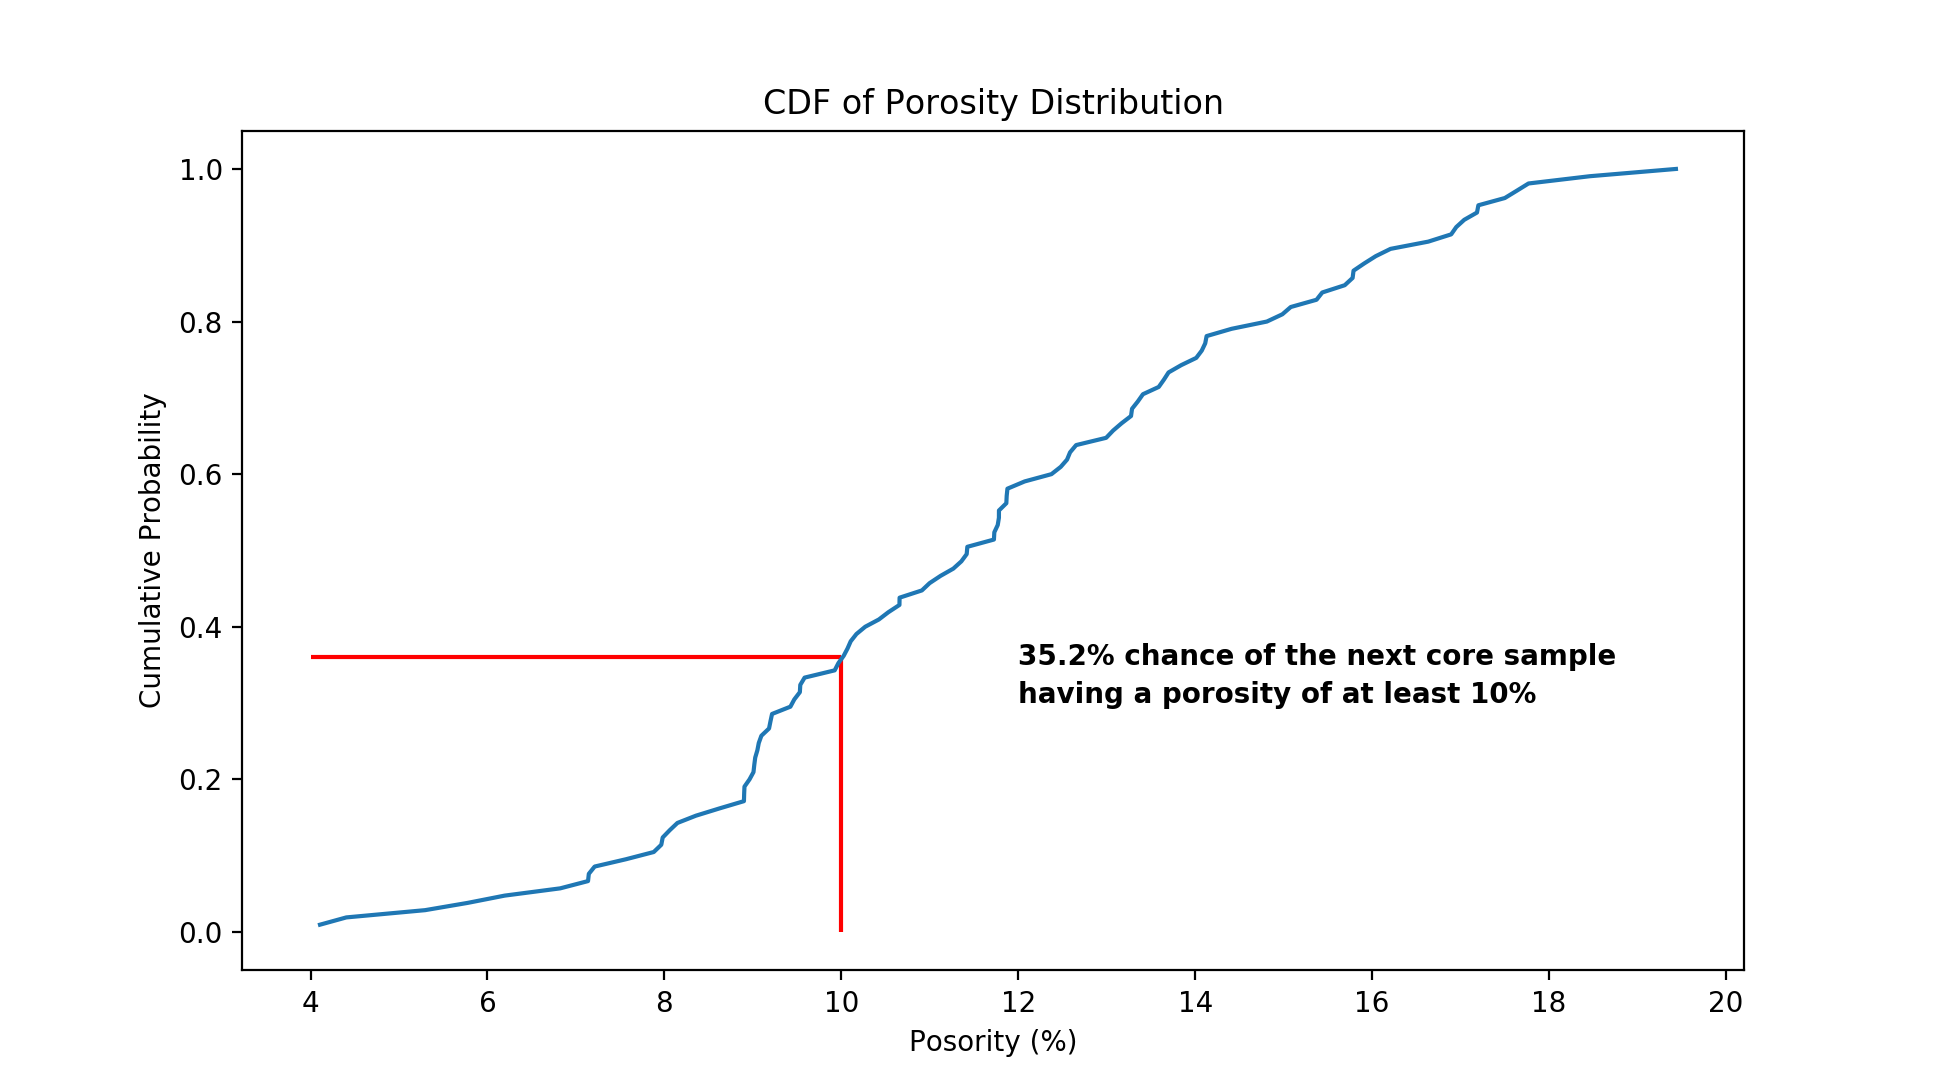

In [24]:
# clears annotations from previous plot
h.remove()
v.remove()
t1.remove()
t2.remove()

h = ax.hlines(y=0.36, xmin=4, xmax=10, color='red')
v = ax.vlines(x=10, ymin=0, ymax=0.36, color='red')
t1 = ax.text(12, 0.35, '35.2% chance of the next core sample', weight='bold')
t2 = ax.text(12, 0.3, 'having a porosity of at least 10%', weight='bold')

fig

> ### Question 3 : What is the probability of a next core sample having a porosity between 10% and 14% ?

<IPython.core.display.Javascript object>


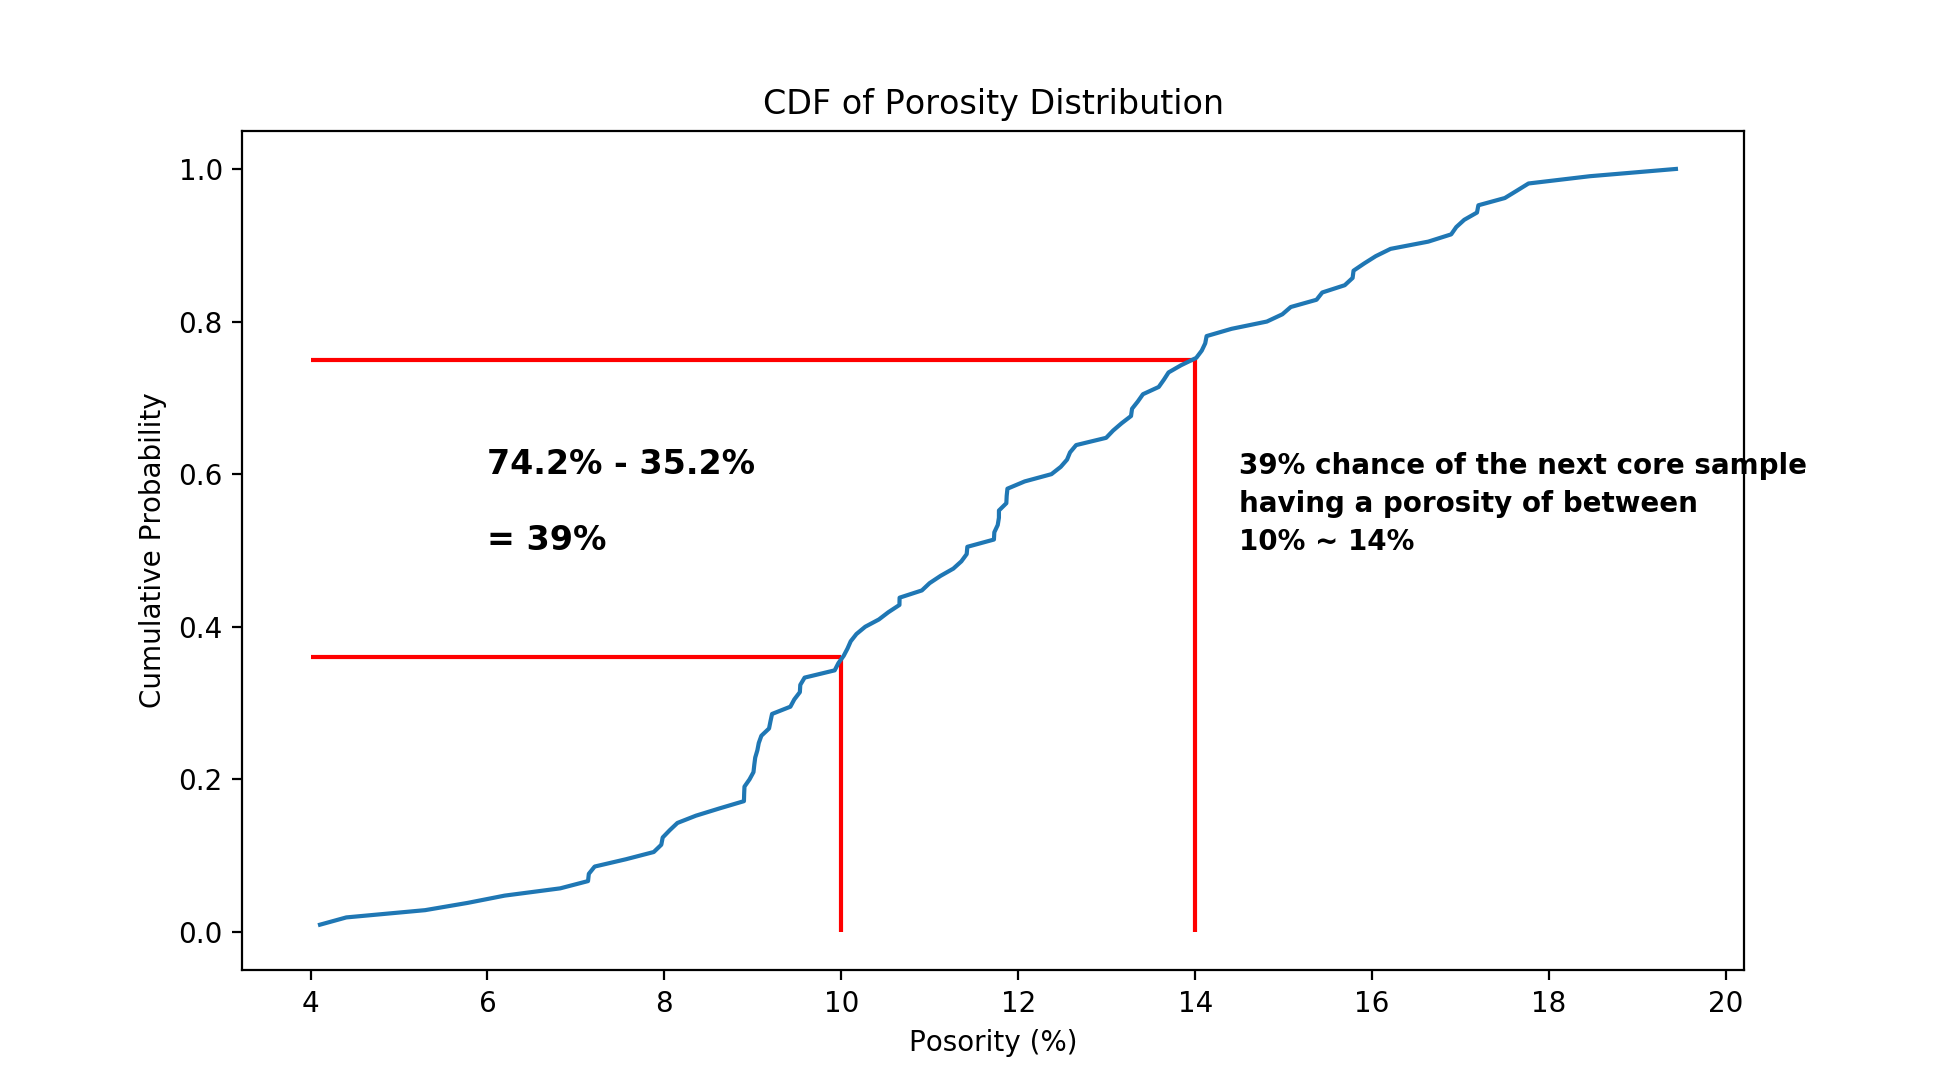

In [25]:
# clears annotations from previous plot
h.remove()
v.remove()
t1.remove()
t2.remove()

ax.hlines(y=0.36, xmin=4, xmax=10, color='red')
ax.vlines(x=10, ymin=0, ymax=0.36, color='red')
ax.hlines(y=0.75, xmin=4, xmax=14, color='red')
ax.vlines(x=14, ymin=0, ymax=0.75, color='red')

ax.text(6, 0.6, '74.2% - 35.2%', fontsize=12, weight='bold')
ax.text(6, 0.5, '= 39%', fontsize=12, weight='bold')

ax.text(14.5, 0.6, '39% chance of the next core sample', weight='bold')
ax.text(14.5, 0.55, 'having a porosity of between', weight='bold')
ax.text(14.5, 0.5, '10% ~ 14%', weight='bold')

fig

## 3.2 Calculating Percentile of Value with Scipy
In order to leverage the power of CDF, one needs to identify the probability first. However, plotting CDF and obtaining the probability graphically can be tedious and inaccurate. A few lines of code will do the trick the extract the information one needs. **scipy.stats.percentileofscore** will be the perfect fit.

[Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html)

In [28]:
from scipy.stats import percentileofscore

por_10 = percentileofscore(porosity, 10)
por_14 = percentileofscore(porosity, 14)

print('Chance of core sample having at least 10% porosity =', round(por_10, 1), '%')
print('Chance of core sample having at least 14% porosity =', round(por_14, 1), '%')
print('')
print('Chance of core sample having porosity between 10% - 14% =', round(por_14 - por_10, 1), '%')

Chance of core sample having at least 10% porosity = 35.2 %
Chance of core sample having at least 14% porosity = 74.3 %

Chance of core sample having porosity between 10% - 14% = 39.0 %


## 3.3 Calculating Value of Percentile with Numpy
A value of percentile can be found using **numpy.percentile**. It is the same as getting the inverse of *percentileofscore()*

[Numpy Documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.percentile.html)

In [23]:
P74_3 = np.percentile(porosity, 74.3)
P35_2 = np.percentile(porosity, 35.2)

print('Porosity of core sample at P74.3 percentile =', round(P74_3, 1), '%')
print('Porosity of core sample at P35.2 percentile =', round(P35_2, 1), '%')

Porosity of core sample at P74.3 percentile = 13.9 %
Porosity of core sample at P35.2 percentile = 10.0 %
